In [1]:
from __future__ import print_function
import collections
import io
import pandas as pd
import numpy as np
import math
import operator
import sys
import networkx as nx
from textpre import cleanText

In [2]:
!pip install pandas
!pip install nltk
!pip install scikit-learn
!pip install matplotlib

In [3]:
nodeHash = {}
textRank = {}
word_dict = collections.defaultdict(dict)
size = 0
sentences = []

In [4]:
word_dict, sentences, size = cleanText('test.txt')
print(size)
print(word_dict)
window = 3
numberofSentences = 6
n = int(math.ceil(min(0.1 * size, 7 * math.log(size))))
word_score = collections.defaultdict(dict)
count = 0
for i in word_dict.keys():
    for j in range(0, len(word_dict[i])):
        count += 1
        position = float(count) / (float(size) + 1.0)
        word_score[i][j] = 1.0 / (math.pi * math.sqrt(position * (1 - position)))
        word = word_dict[i][j]
        if word in nodeHash:
            if nodeHash[word] < word_score[i][j]:
                nodeHash[word] = word_score[i][j]
        else:
            nodeHash[word] = word_score[i][j]

69
{0: ['शाळां', '1', 'मे', 'पासून', 'सुट्ट्', 'जाहीर', '14', 'जूनपासून', 'नवे', 'शैक्षणिक', 'वर्ष', 'राज्याती', 'प्राथमिक', 'माध्यमिक', 'उच्च', 'माध्यमिक', 'शाळां', '1', 'मे', 'पासून', 'सुट्ट्', 'जाहीर', 'करण्या', 'आल्या', '1', 'मे', '13', 'जून', 'दरम्यान', 'शाळां', 'सुट्टी', 'राहणार', 'राज्याती', 'शिक्षक', 'संघटनाकडून', 'वारंवार', 'केल्', 'मागणीनंतर', 'शाळां', 'सुट्टी', 'जाहीर', 'करण्या', 'आल्या', 'दखल', 'घेत', 'शाळां', 'सुट्टी', 'देण्याबाब', 'निर्णय', 'जाहीर', 'करण्या', 'नवे', 'शैक्षणिक', 'वर्ष', 'जरी', '14', 'जूनपासून', 'असले', 'प्रत्यक्ष', 'शाळा', 'होण्याबाबत', 'निर्णय', 'कालांतरा', 'कोरो', 'परिस्थिती', 'आढावा', 'त्याबाब', 'कळविले', 'जाणार']}


In [5]:
for i in word_dict.keys():
    print(word_dict[i])

['शाळां', '1', 'मे', 'पासून', 'सुट्ट्', 'जाहीर', '14', 'जूनपासून', 'नवे', 'शैक्षणिक', 'वर्ष', 'राज्याती', 'प्राथमिक', 'माध्यमिक', 'उच्च', 'माध्यमिक', 'शाळां', '1', 'मे', 'पासून', 'सुट्ट्', 'जाहीर', 'करण्या', 'आल्या', '1', 'मे', '13', 'जून', 'दरम्यान', 'शाळां', 'सुट्टी', 'राहणार', 'राज्याती', 'शिक्षक', 'संघटनाकडून', 'वारंवार', 'केल्', 'मागणीनंतर', 'शाळां', 'सुट्टी', 'जाहीर', 'करण्या', 'आल्या', 'दखल', 'घेत', 'शाळां', 'सुट्टी', 'देण्याबाब', 'निर्णय', 'जाहीर', 'करण्या', 'नवे', 'शैक्षणिक', 'वर्ष', 'जरी', '14', 'जूनपासून', 'असले', 'प्रत्यक्ष', 'शाळा', 'होण्याबाबत', 'निर्णय', 'कालांतरा', 'कोरो', 'परिस्थिती', 'आढावा', 'त्याबाब', 'कळविले', 'जाणार']


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
Encodedoc=[]
vectorizer = CountVectorizer()
vectorizer.fit(sentences)
vector = vectorizer.transform(sentences)
Encodehead=vector.toarray()

In [7]:
Encodehead

array([[1, 2, 2, 1, 1, 3, 4, 1, 1, 1, 3, 1, 1, 1, 1, 2, 3, 1, 1, 1, 2, 2,
        1, 2, 1, 1, 2, 1, 2, 1, 2, 1]])

In [8]:
sentences

['शाळांना 1 मे पासून सुट्ट्या जाहीर, 14 जूनपासून नवे शैक्षणिक वर्ष सुरू होणार.राज्यातील प्राथमिक, माध्यमिक, उच्च माध्यमिक शाळांना 1 मे पासून सुट्ट्या जाहीर करण्यात आल्या आहे.1 मे ते 13 जून दरम्यान शाळांना सुट्टी राहणार आहे.राज्यातील शिक्षक संघटनाकडून वारंवार केल्या जात असलेल्या मागणीनंतर शाळांना सुट्टी जाहीर करण्यात आल्या आहेत.याची दखल घेत, आज शाळांना सुट्टी देण्याबाबत निर्णय जाहीर करण्यात आला.नवे शैक्षणिक वर्ष जरी 14 जूनपासून सुरू होणार असले तरी प्रत्यक्ष शाळा सुरू होण्याबाबतचा निर्णय कालांतराने कोरोना परिस्थितीचा आढावा घेऊन त्याबाबत कळविले जाणार आहे.']

In [9]:
for i in word_score.keys():
    print(word_score[i])

{0: 2.6824005035708818, 1: 1.9106393291087596, 2: 1.571629378929303, 3: 1.3713433469338576, 4: 1.235965894286053, 5: 1.1370578351324445, 6: 1.0610329539459689, 7: 1.000477506807591, 8: 0.9509594425045819, 9: 0.9096462681059554, 10: 0.8746329186841766, 11: 0.844585356887143, 12: 0.8185384096053555, 13: 0.7957747154594768, 14: 0.7757489439615897, 15: 0.7580385567549629, 16: 0.7423107873708424, 17: 0.7282998876374699, 18: 0.7157910746772922, 19: 0.7046089694628185, 20: 0.6946091180428567, 21: 0.6856716734669288, 22: 0.6776966211456048, 23: 0.6706001258927204, 24: 0.6643117071893654, 25: 0.6587720351322232, 26: 0.6539311981601575, 27: 0.6497473343613969, 28: 0.6461855468946374, 29: 0.6432170446587575, 30: 0.6408184643544643, 31: 0.6389713411997066, 32: 0.6376617039524284, 33: 0.6368797763695865, 34: 0.6366197723675814, 35: 0.6368797763695864, 36: 0.6376617039524284, 37: 0.6389713411997066, 38: 0.6408184643544643, 39: 0.6432170446587574, 40: 0.6461855468946374, 41: 0.6497473343613969, 42: 0

In [10]:
nodeHash

{'शाळां': 2.6824005035708818,
 '1': 1.9106393291087596,
 'मे': 1.571629378929303,
 'पासून': 1.3713433469338576,
 'सुट्ट्': 1.235965894286053,
 'जाहीर': 1.1370578351324445,
 '14': 1.0610329539459689,
 'जूनपासून': 1.000477506807591,
 'नवे': 0.9509594425045819,
 'शैक्षणिक': 0.9096462681059554,
 'वर्ष': 0.8746329186841766,
 'राज्याती': 0.844585356887143,
 'प्राथमिक': 0.8185384096053555,
 'माध्यमिक': 0.7957747154594768,
 'उच्च': 0.7757489439615897,
 'करण्या': 0.7157910746772922,
 'आल्या': 0.6706001258927204,
 '13': 0.6539311981601575,
 'जून': 0.6497473343613969,
 'दरम्यान': 0.6461855468946374,
 'सुट्टी': 0.6776966211456048,
 'राहणार': 0.6389713411997066,
 'शिक्षक': 0.6368797763695865,
 'संघटनाकडून': 0.6366197723675814,
 'वारंवार': 0.6368797763695864,
 'केल्': 0.6376617039524284,
 'मागणीनंतर': 0.6389713411997066,
 'दखल': 0.6587720351322232,
 'घेत': 0.6643117071893654,
 'देण्याबाब': 0.6856716734669288,
 'निर्णय': 1.0004775068075908,
 'जरी': 0.7757489439615894,
 'असले': 0.8445853568871432,
 'प

In [11]:
graph = nx.Graph()
graph.add_nodes_from(nodeHash.keys())
for i in word_dict.keys():
    for j in range(0, len(word_dict[i])):
        current_word = word_dict[i][j]
        next_words = word_dict[i][j + 1:j + window]
        for word in next_words:
            graph.add_edge(current_word, word,unicode='utf-8', weight=(nodeHash[current_word] + nodeHash[word]) / 2)
textRank = nx.pagerank(graph, weight='weight')
keyphrases = sorted(textRank, key=textRank.get, reverse=True)[:n]

In [17]:
keyphrases

['शाळां',
 'निर्णय',
 'जाहीर',
 'वर्ग',
 'जूनपासून',
 'विद्यार्थ्यां',
 'शिक्षकां',
 'पार्श्वभूमीवर',
 'सुट्टी',
 'शाळा',
 'मे',
 'कोरो',
 '1',
 'ऑनलाइन',
 'इयत्ता',
 '14',
 'राज्याती']

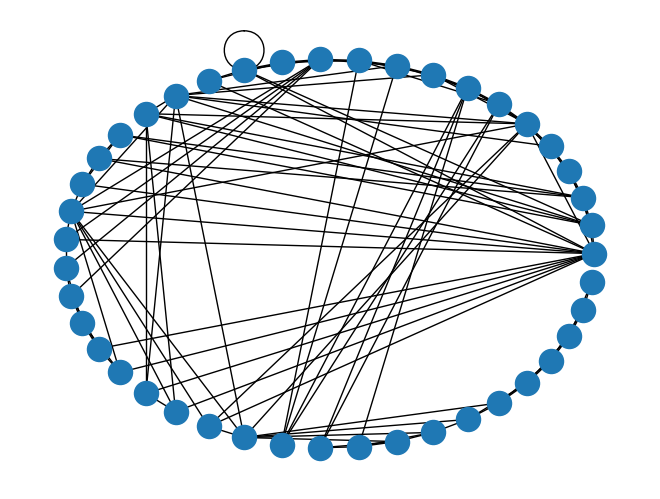

In [12]:
import matplotlib.pyplot as plt
nx.draw_circular(graph)

In [13]:
textRank

{'शाळां': 0.08855770151057682,
 '1': 0.03790475018326423,
 'मे': 0.03528185901438872,
 'पासून': 0.020557476788162412,
 'सुट्ट्': 0.022189383604660353,
 'जाहीर': 0.04339739200417209,
 '14': 0.028343993720993447,
 'जूनपासून': 0.02797641228100034,
 'नवे': 0.022731344819622672,
 'शैक्षणिक': 0.022346409089551305,
 'वर्ष': 0.02282180621425406,
 'राज्याती': 0.028175234741061542,
 'प्राथमिक': 0.01535852289201369,
 'माध्यमिक': 0.0246164347909703,
 'उच्च': 0.014511373106329538,
 'करण्या': 0.02878613541004384,
 'आल्या': 0.020193622512482974,
 '13': 0.015121168546121846,
 'जून': 0.016411807018039078,
 'दरम्यान': 0.015157395250345977,
 'सुट्टी': 0.031319815028569106,
 'राहणार': 0.016485782973442484,
 'शिक्षक': 0.014871728513744017,
 'संघटनाकडून': 0.015025677537979582,
 'वारंवार': 0.014667827642515313,
 'केल्': 0.017182136694865312,
 'मागणीनंतर': 0.01638745600106798,
 'दखल': 0.015173691775378117,
 'घेत': 0.015197998191388912,
 'देण्याबाब': 0.016449076281536707,
 'निर्णय': 0.030992617859050976,
 'जरी

In [14]:
sentenceScore = {}
for i in word_dict.keys():
    position = float(i + 1) / (float(len(sentences)) + 1.0)
    positionalFeatureWeight = 1.0 / (math.pi * math.sqrt(position * (1.0 - position)))
    sumKeyPhrases = 0.0
    for keyphrase in keyphrases:
        if keyphrase in word_dict[i]:
            sumKeyPhrases += textRank[keyphrase]
    sentenceScore[i] = sumKeyPhrases * positionalFeatureWeight
sSentenceScores = sorted(sentenceScore.items(), key=operator.itemgetter(1), reverse=True)[:numberofSentences]
sSentenceScores = sorted(sSentenceScores, key=operator.itemgetter(0), reverse=False)

In [15]:
sSentenceScores

[(0, 0.1885924138965387)]

In [16]:
stri="test.txt"
tp=open(stri, 'w',encoding="utf-8")
for i in range(0, len(sSentenceScores)):
    print(sentences[sSentenceScores[i][0]])
    tp.write(sentences[sSentenceScores[i][0]])
tp.close()

शाळांना 1 मे पासून सुट्ट्या जाहीर, 14 जूनपासून नवे शैक्षणिक वर्ष सुरू होणार.राज्यातील प्राथमिक, माध्यमिक, उच्च माध्यमिक शाळांना 1 मे पासून सुट्ट्या जाहीर करण्यात आल्या आहे.1 मे ते 13 जून दरम्यान शाळांना सुट्टी राहणार आहे.राज्यातील शिक्षक संघटनाकडून वारंवार केल्या जात असलेल्या मागणीनंतर शाळांना सुट्टी जाहीर करण्यात आल्या आहेत.याची दखल घेत, आज शाळांना सुट्टी देण्याबाबत निर्णय जाहीर करण्यात आला.नवे शैक्षणिक वर्ष जरी 14 जूनपासून सुरू होणार असले तरी प्रत्यक्ष शाळा सुरू होण्याबाबतचा निर्णय कालांतराने कोरोना परिस्थितीचा आढावा घेऊन त्याबाबत कळविले जाणार आहे.
